In [12]:
import numpy as np
import pandas as pd

from utils import normalize
from kmeans import KMeansModel

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
data = pd.read_csv("data.csv", sep=";", decimal=",")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

/Users/ArielMartinezSilberstein/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,23,33,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eleccion,vueltae,cargo,tipocargo,fechae,anoe,periodo,fechainicio,diainicio,mesinicio,...,siglapart_text,pacto_text,subpacto_text,aux_folio,aux_partido,aux_pacto,aux_subpacto,vototot,voto_h,voto_m
0,Presidenciales,Primera,Presidente,Eleccion Popular,14-12-89,1989,1990-1994,11-03-90,11,3,...,IND,NaN,NaN,IND NA NA,IndFP,IndFP,NaN,962,505.0,457.0
1,Presidenciales,Primera,Presidente,Eleccion Popular,14-12-89,1989,1990-1994,11-03-90,11,3,...,IND,NaN,NaN,IND NA NA,IndFP,IndFP,NaN,369,190.0,179.0
2,Presidenciales,Primera,Presidente,Eleccion Popular,14-12-89,1989,1990-1994,11-03-90,11,3,...,IND,NaN,NaN,IND NA NA,IndFP,IndFP,NaN,203,106.0,97.0
3,Presidenciales,Primera,Presidente,Eleccion Popular,14-12-89,1989,1990-1994,11-03-90,11,3,...,IND,NaN,NaN,IND NA NA,IndFP,IndFP,NaN,219,117.0,102.0
4,Presidenciales,Primera,Presidente,Eleccion Popular,14-12-89,1989,1990-1994,11-03-90,11,3,...,IND,NaN,NaN,IND NA NA,IndFP,IndFP,NaN,2660,1358.0,1302.0


In [41]:
x_name, y_name = "voto_m", "voto_h"
source = data[np.logical_and(np.isfinite(data[x_name]), np.isfinite(data[y_name]))]
source = source[[x_name, y_name]]
source.head()

,voto_m,voto_h
0,457.0,505.0
1,179.0,190.0
2,97.0,106.0
3,102.0,117.0
4,1302.0,1358.0


In [42]:
source = normalize(source, source.min(), source.max())
source.head()

,voto_m,voto_h
0,0.007210,0.010003
1,0.002824,0.003763
2,0.001530,0.002100
3,0.001609,0.002317
4,0.020541,0.026899


In [ ]:
model = KMeansModel()
centroids, clusters = model.cluster(source, 3, 6)

result = []
for idx, cluster in clusters.items():
    for vector in cluster:
        result.append({
            x_name: vector[0],
            y_name: vector[1],
            "label": idx
        })
result = pd.DataFrame(result)
result.head()

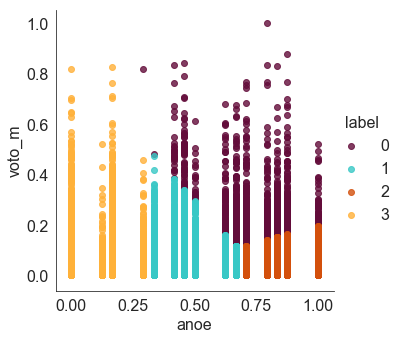

In [36]:
plt.rc("font", size=16)
sns.set_style("white")
palette = ["#630C3A", "#39C8C6", "#D3500C"]
sns.set_palette(palette)
facet = sns.lmplot(data=result, x=x_name, y=y_name, hue="label", fit_reg=False, legend=True, legend_out=True)